In [1]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from definitions import model_dir

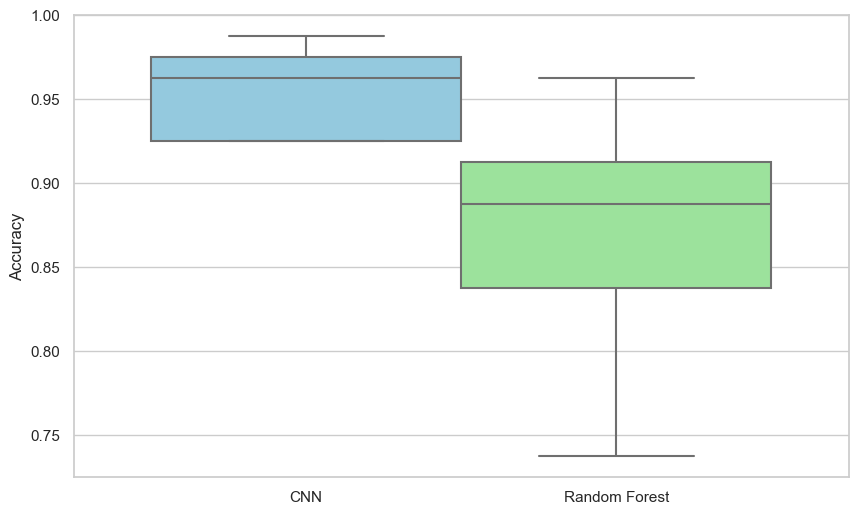

In [3]:
def load_model_data(model: str):
    data = pd.read_csv(os.path.join(model_dir, f'{model}.csv'), index_col=0)
    data.index.name = 'model'
    return data
    
df = pd.concat([load_model_data('cnn'), load_model_data('random-forest')])
df_long = pd.melt(df.reset_index(), id_vars='model', var_name='Model', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")
palette = {"CNN": "skyblue", "Random Forest": "lightgreen"}
sns.boxplot(data=df_long, y='Accuracy', hue='Model',
            palette=palette, linewidth=1.5, fliersize=3)

plt.ylabel('Accuracy')
plt.xlabel('')
plt.xticks(ticks=[-0.2, 0.2], labels=['CNN', 'Random Forest'])
plt.legend([],[], frameon=False)
plt.show()